**Step-1 : Import required packages**

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Step-2 : Read the data**

In [83]:
from sklearn.datasets import fetch_california_housing
import warnings
warnings.filterwarnings('ignore')
california=fetch_california_housing(as_frame=True)
california_df=california['frame']
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Step-3 : Data Quick Checks**

In [84]:
california_df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [85]:
california_df.shape

(20640, 9)

In [86]:
california_df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [87]:
california_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [88]:
california_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


**Step-4 : Null value analysis**

In [89]:
california_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

- We didn't have any null values

**Step-5 : Analysis on columns**

In [90]:
num=california_df.select_dtypes(exclude='object').columns
num

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

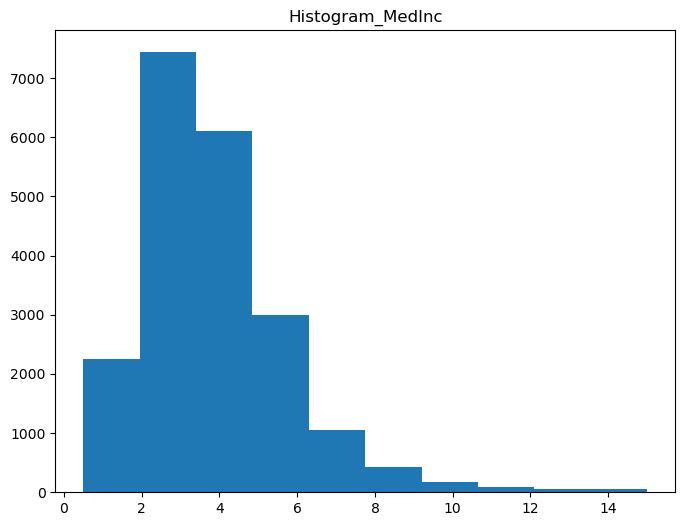

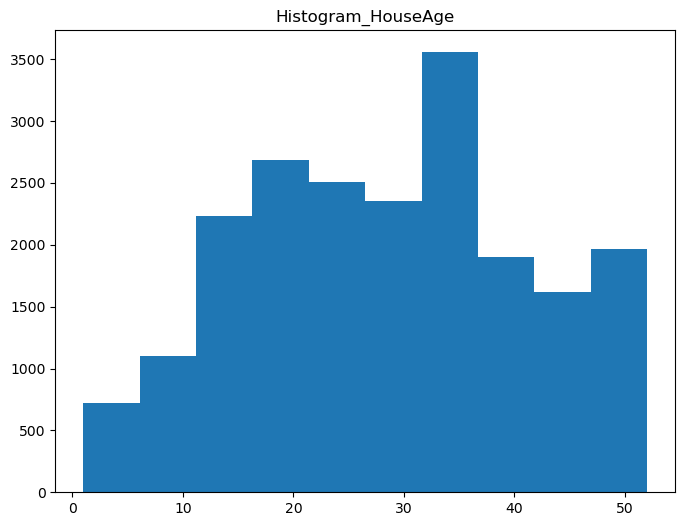

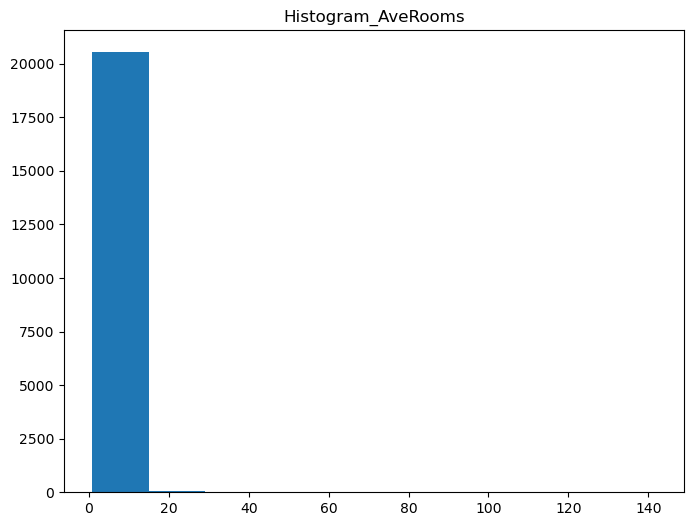

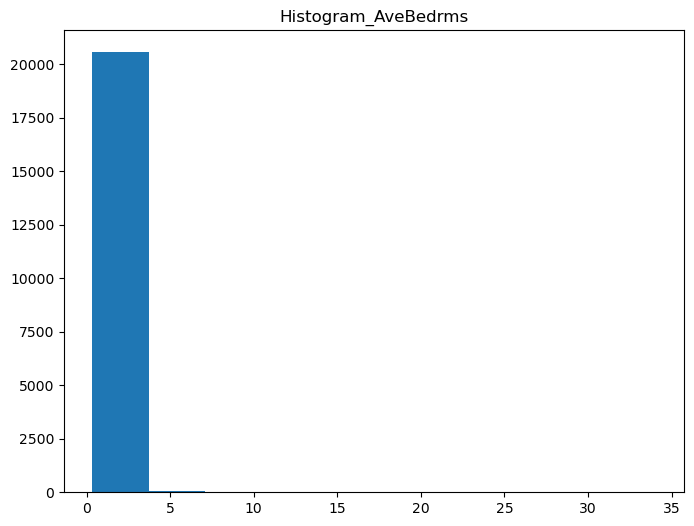

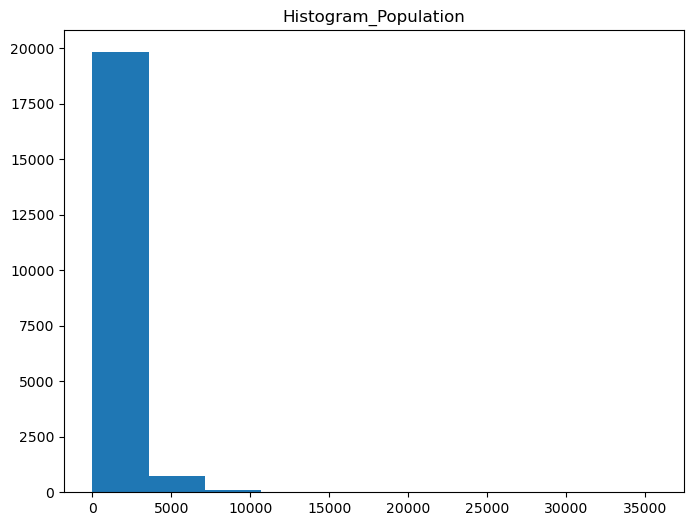

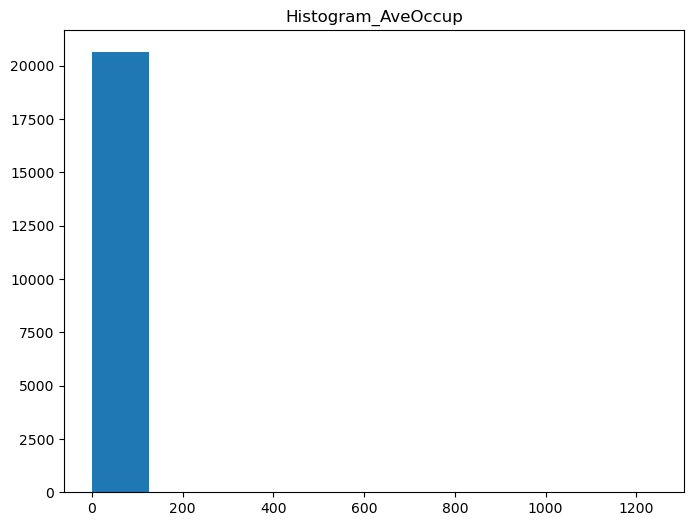

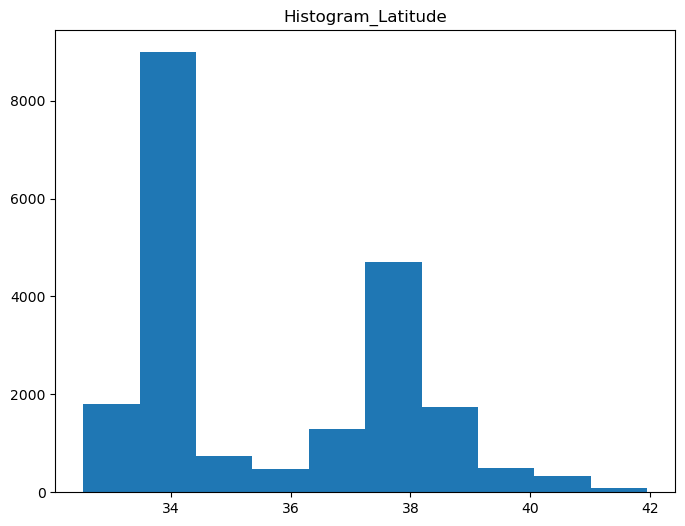

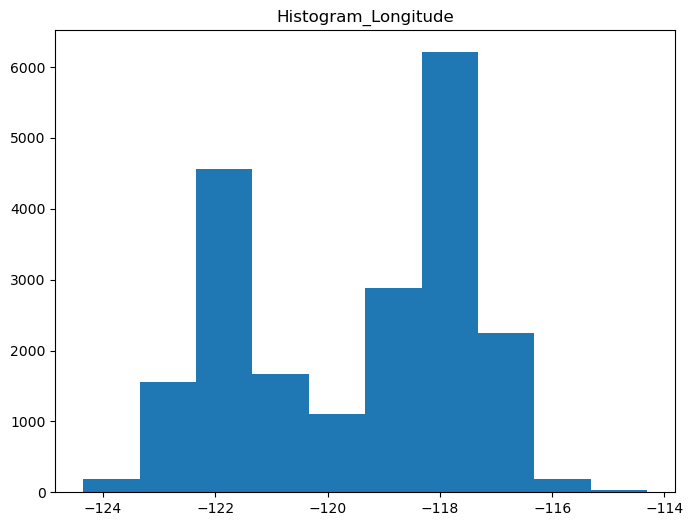

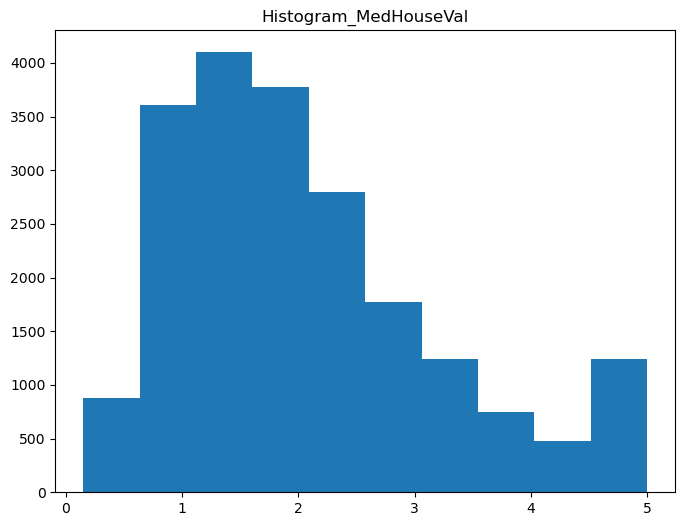

In [91]:
# Histogram
for i in num:
    plt.figure(figsize=(8,6))
    plt.hist(california_df[i])
    plt.title(f'Histogram_{i}')
    plt.show()

<Figure size 800x600 with 0 Axes>

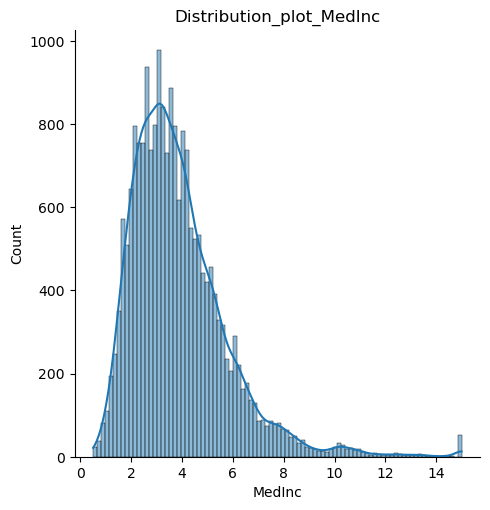

<Figure size 800x600 with 0 Axes>

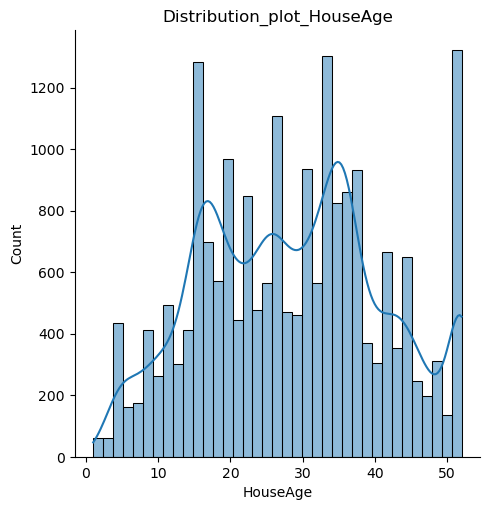

<Figure size 800x600 with 0 Axes>

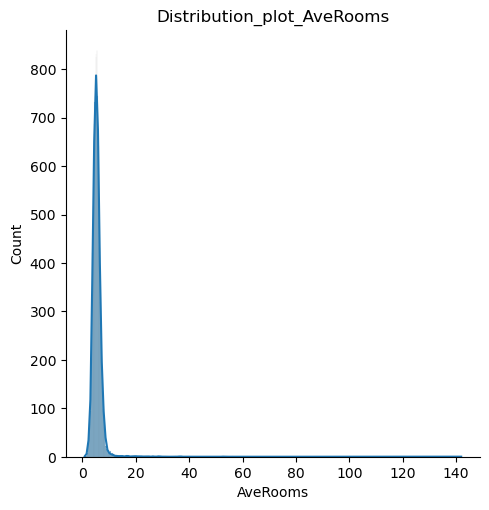

<Figure size 800x600 with 0 Axes>

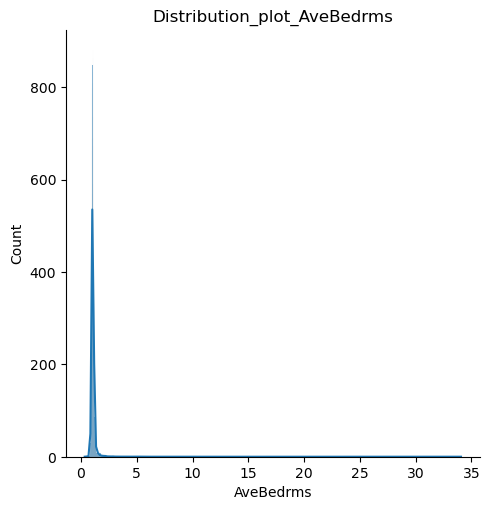

<Figure size 800x600 with 0 Axes>

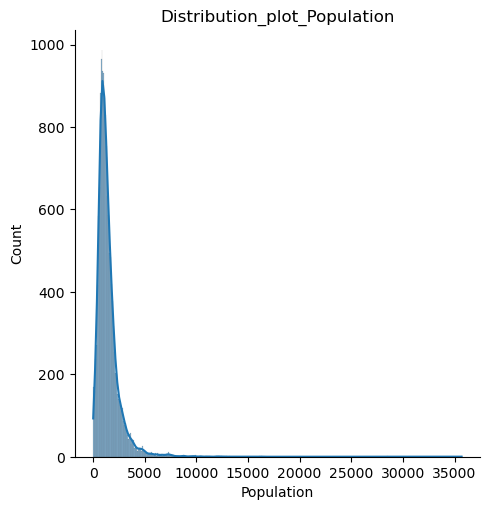

<Figure size 800x600 with 0 Axes>

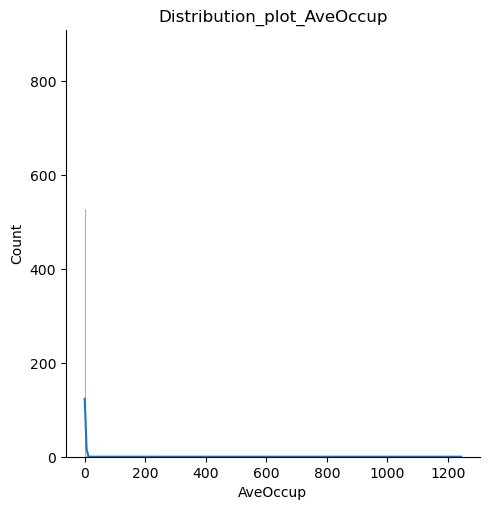

<Figure size 800x600 with 0 Axes>

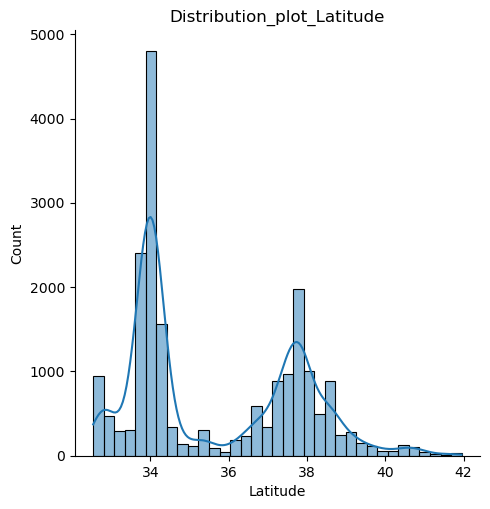

<Figure size 800x600 with 0 Axes>

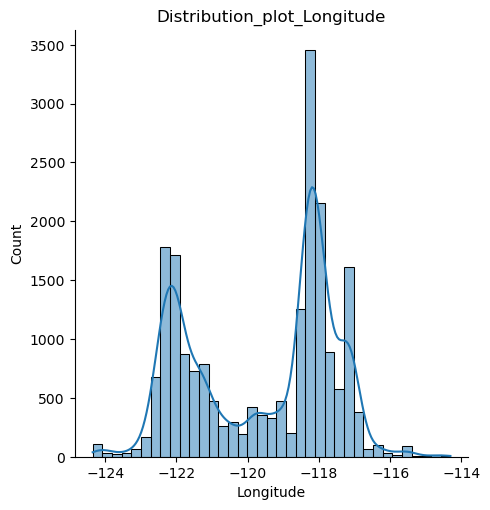

<Figure size 800x600 with 0 Axes>

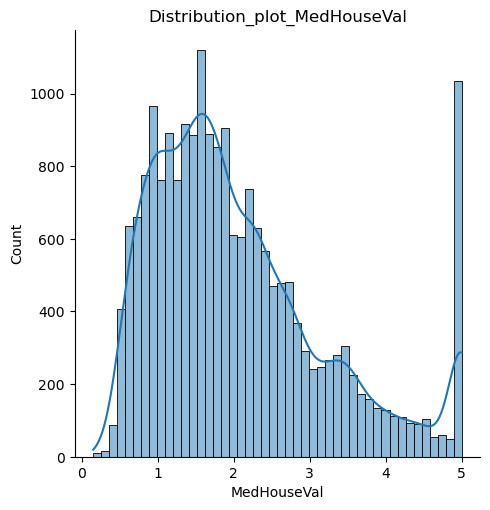

In [92]:
# distribution plots
for i in num:
    plt.figure(figsize=(8,6))
    sns.displot(california_df[i],kde=True)
    plt.title(f'Distribution_plot_{i}')
    plt.show()

**Step-6 : Feature Selection**

- Using VIF

In [93]:
X=california_df.drop('MedHouseVal',axis=1)
y=california_df['MedHouseVal']
X.values


array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data=pd.DataFrame(vif,columns=['VIF'],index=X.columns)
vif_data.sort_values(by='VIF',ascending=False)

,VIF
Longitude,633.711654
Latitude,559.874071
AveRooms,45.993601
AveBedrms,43.590314
MedInc,11.511140
HouseAge,7.195917
Population,2.935745
AveOccup,1.095243


In [95]:
# select vif less than 15 columns
cols_1=vif_data[vif_data['VIF']<15].index
cols_1=cols_1.to_list()
cols_1

['MedInc', 'HouseAge', 'Population', 'AveOccup']

In [79]:
# select vif greater than 15 columns
vif_data[vif_data['VIF']>15].index

Index(['AveRooms', 'AveBedrms', 'Latitude', 'Longitude'], dtype='object')

In [98]:
# out of 4 columns we need 2
cols_2=['AveRooms','Latitude']
final_cols=cols_1+cols_2
final_cols

['MedInc', 'HouseAge', 'Population', 'AveOccup', 'AveRooms', 'Latitude']

In [99]:
# final df 
final_df=X[final_cols]
final_df['MedHouseVal']=y
final_df

,MedInc,HouseAge,Population,AveOccup,AveRooms,Latitude,MedHouseVal
0,8.3252,41.0,322.0,2.555556,6.984127,37.88,4.526
1,8.3014,21.0,2401.0,2.109842,6.238137,37.86,3.585
2,7.2574,52.0,496.0,2.802260,8.288136,37.85,3.521
3,5.6431,52.0,558.0,2.547945,5.817352,37.85,3.413
4,3.8462,52.0,565.0,2.181467,6.281853,37.85,3.422
...,...,...,...,...,...,...,...
20635,1.5603,25.0,845.0,2.560606,5.045455,39.48,0.781
20636,2.5568,18.0,356.0,3.122807,6.114035,39.49,0.771
20637,1.7000,17.0,1007.0,2.325635,5.205543,39.43,0.923
20638,1.8672,18.0,741.0,2.123209,5.329513,39.43,0.847


**Step-7 : Scale the data**

In [100]:
X=final_df.drop('MedHouseVal',axis=1)
y=final_df['MedHouseVal']

In [101]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaled=ss.fit_transform(X)
X_scaled_df=pd.DataFrame(scaled,columns=X.columns)
X_scaled_df

,MedInc,HouseAge,Population,AveOccup,AveRooms,Latitude
0,2.344766,0.982143,-0.974429,-0.049597,0.628559,1.052548
1,2.332238,-0.607019,0.861439,-0.092512,0.327041,1.043185
2,1.782699,1.856182,-0.820777,-0.025843,1.155620,1.038503
3,0.932968,1.856182,-0.766028,-0.050329,0.156966,1.038503
4,-0.012881,1.856182,-0.759847,-0.085616,0.344711,1.038503
...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.512592,-0.049110,-0.155023,1.801647
20636,-0.691593,-0.845393,-0.944405,0.005021,0.276881,1.806329
20637,-1.142593,-0.924851,-0.369537,-0.071735,-0.090318,1.778237
20638,-1.054583,-0.845393,-0.604429,-0.091225,-0.040211,1.778237


**Step-8 : Split the data**

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled_df,
                                              y,
                                              test_size=0.2,
                                              random_state=1234)

In [103]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((16512, 6), (4128, 6), (16512,), (4128,))

**Step-9 : Develop ML model**

In [104]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [105]:
# intercept
lr.intercept_ 

2.064461711696833

In [106]:
# coefficents
lr.coef_

array([ 0.83282203,  0.21988607,  0.02088911, -0.04501625, -0.06751527,
       -0.09058146])

In [107]:
# predictions
y_pred=lr.predict(X_test)
y_pred

array([2.30473678, 3.26212585, 2.25235989, ..., 1.39434401, 2.39395217,
       1.71946446])

**Step-10 : Evalution**

In [108]:
eval_df=pd.DataFrame(X_test)
eval_df['y_actual']=y_test
eval_df['y_pred']=y_pred
eval_df

,MedInc,HouseAge,Population,AveOccup,AveRooms,Latitude,y_actual,y_pred
15712,-0.099733,1.856182,-0.716577,-0.129594,-0.234704,1.010411,5.00000,2.304737
4119,0.885225,1.856182,0.367812,-0.009598,0.282943,-0.698469,2.93900,3.262126
15725,0.002279,1.220517,-0.763379,-0.129966,-0.278781,1.005730,4.12500,2.252360
14616,-0.210589,-0.686477,0.350151,0.031639,-0.062546,-1.325839,1.57600,1.868342
13238,2.027992,-1.481058,-0.180564,0.035508,1.045992,-0.703151,3.04100,3.415456
...,...,...,...,...,...,...,...,...
13521,0.703519,-0.686477,-0.779274,-0.017558,0.299587,-0.651651,1.64300,2.522734
16913,5.011449,-0.289187,0.071989,-0.007758,1.390417,0.898047,5.00001,6.001151
20069,-0.699541,0.108104,-1.045073,-0.045110,-0.138627,1.113413,1.23200,1.394344
446,0.002279,1.856182,-0.917913,-0.113472,-0.421058,1.047866,1.82600,2.393952


In [109]:
# Metrics
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
R_square=r2_score(y_test,y_pred)
rmse=np.sqrt(mse)
print('Mse:',mse)
print('rmse:',rmse)
print('r2_square:',R_square)

Mse: 0.6676008481118304
rmse: 0.8170684476295914
r2_square: 0.5065090715994581


**Save The Model**

In [136]:
import pickle
with open('linear_regression_california1.pkl','wb') as file:
    pickle.dump(lr,file)

**Load The Model**

In [137]:
path=open('linear_regression_california.pkl','rb')
loaded_model=pickle.load(path)
loaded_model

LinearRegression()

# Checking Fitting

Training MSE: 0.6309, R²: 0.5243
Testing MSE: 0.6676, R²: 0.5065
The model is likely **Underfitting** (Both train and test scores are low).


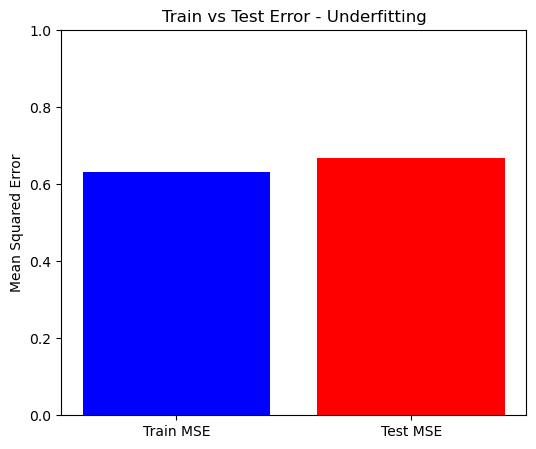

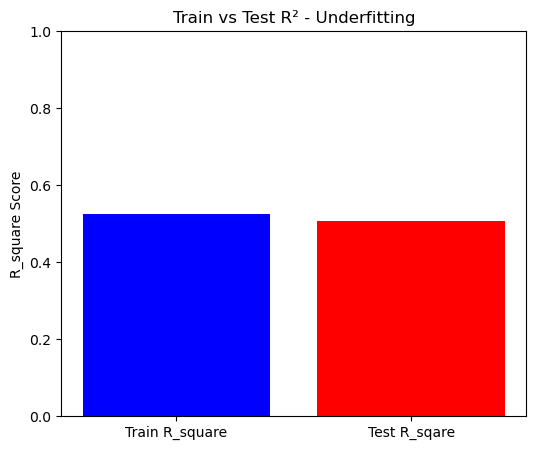

In [134]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# Compute errors
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print(f"Training MSE: {train_mse:.4f}, R²: {train_r2:.4f}")
print(f"Testing MSE: {test_mse:.4f}, R²: {test_r2:.4f}")

# Define threshold for overfitting detection
error_ratio = test_mse / train_mse

# Model fitting check
if train_r2 > 0.9 and test_r2 < 0.7:
    model_status = "Overfitting"
    print("The model is likely **Overfitting** (High train score, low test score).")
elif train_r2 < 0.6 and test_r2 < 0.6:
    model_status = "Underfitting"
    print("The model is likely **Underfitting** (Both train and test scores are low).")
elif 0.8 <= error_ratio <= 1.2:
    model_status = "Well-Fitted"
    print("The model is **Well-Fitted** (Train and test errors are close).")
else:
    model_status = "Needs Improvement"
    print("The model shows a slight imbalance; consider tuning hyperparameters.")

# Plot Train vs Test Errors
plt.figure(figsize=(6, 5))
plt.bar(["Train MSE", "Test MSE"], [train_mse, test_mse], color=["blue", "red"])
plt.ylabel("Mean Squared Error")
plt.title(f"Train vs Test Error - {model_status}")
plt.ylim(0,1)
plt.show()

# Plot Train vs Test R² Score
plt.figure(figsize=(6, 5))
plt.bar(["Train R_square", "Test R_sqare"], [train_r2, test_r2], color=["blue", "red"])
plt.ylabel("R_square Score")
plt.title(f"Train vs Test R² - {model_status}")
plt.ylim(0, 1)
plt.show()

# Assumptions based on features (or) input columns

$Linearity$

- There should be linear relationship between "Dependent variable(output column) and independent variables(input columns)"

- it is an important property to maintain linear relationship

- How to check : **scatter plots** are the best to identify the linear relationship

Index(['MedInc', 'HouseAge', 'Population', 'AveOccup', 'AveRooms', 'Latitude'], dtype='object')


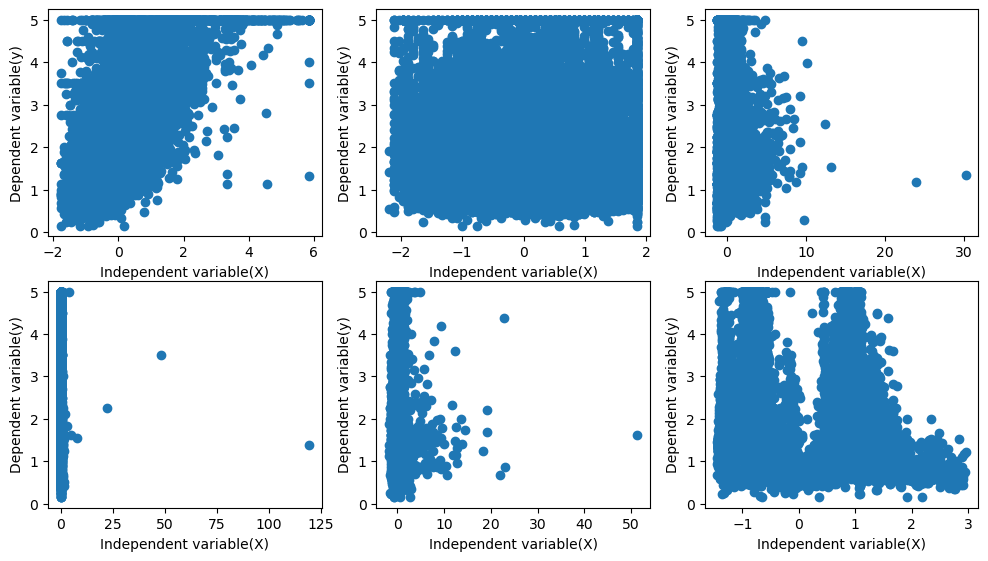

In [116]:
cols=X_train.columns
print(cols)
plt.figure(figsize=(12,10))
for i in range(len(cols)):
    plt.subplot(3,3,i+1)
    plt.scatter(X_train[cols[i]],y_train)
    plt.xlabel('Independent variable(X)')
    plt.ylabel('Dependent variable(y)')

$Multicollinearity$

- We don't want Multicollinearity

- input variables should be independent eachother

- if input columns having relation then we can say that **multicollinearity** exist

- How to check : Variance inflation factor (VIF)

- **Conclusion: in real time senario if vif>10 we can consider as multicollinearity is there**

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=[variance_inflation_factor(X_train.values,i) for i in range(len(X_train.columns))]
vif_df=pd.DataFrame(vif,index=X_train.columns,columns=['VIF'])
vif_df.sort_values(by='VIF',ascending=False)

,VIF
AveRooms,1.197213
MedInc,1.161930
HouseAge,1.140327
Population,1.130716
Latitude,1.039917
AveOccup,1.007771


# Assumptions based on errors (or) residuals

**No auto correlation**

- We don't want any relation

- how to check : durbon watson test

- Ranges : 0-4

    - 0-2 : Negative Relation
 
    - 2   : No relation
 
    - 2-4 : Positive Relation

In [111]:
from statsmodels.stats.stattools import durbin_watson
preds=lr.predict(X_test)
residual=y_test - preds #(actual-predictions)

dw_statistic = round(durbin_watson(residual))
print(f"Durbin-Watson Statistic: {dw_statistic}")

# Interpretation of Durbin-Watson statistic
if dw_statistic < 2:
    print("There may be positive autocorrelation.")
elif dw_statistic > 2:
    print("There may be negative autocorrelation.")
else:
    print("No significant autocorrelation detected.")

Durbin-Watson Statistic: 2
No significant autocorrelation detected.


$Homoscodasticity$

- errors have constant variance throughout the data

- the distribution od errors is constant

- How to check : **Residuals V/S Predictions**

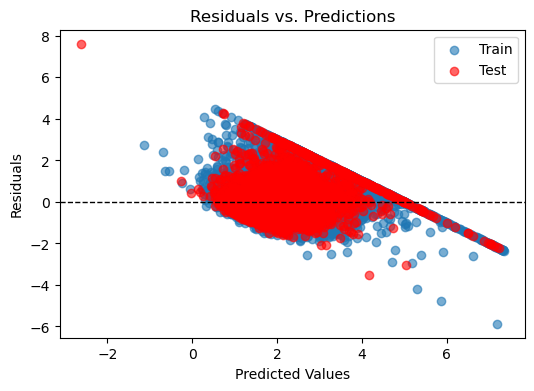

In [114]:
# 1. Make predictions 
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

# 2. Compute residuals
train_residuals = y_train - y_train_pred
test_residuals = y_test - y_test_pred

# 3. Plot Residuals vs Predictions
plt.figure(figsize=(6,4))
plt.scatter(y_train_pred, train_residuals, label="Train", alpha=0.6)
plt.scatter(y_test_pred, test_residuals, label="Test", alpha=0.6, color='red')

plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # Reference line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predictions")
plt.legend()
plt.show()


$Normality$

- how to check : **Q-Q plot**

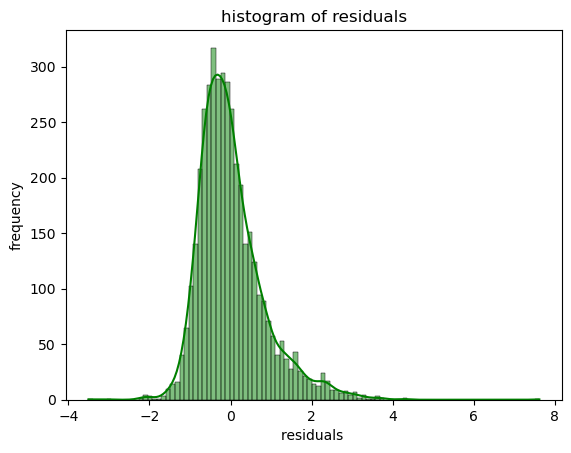

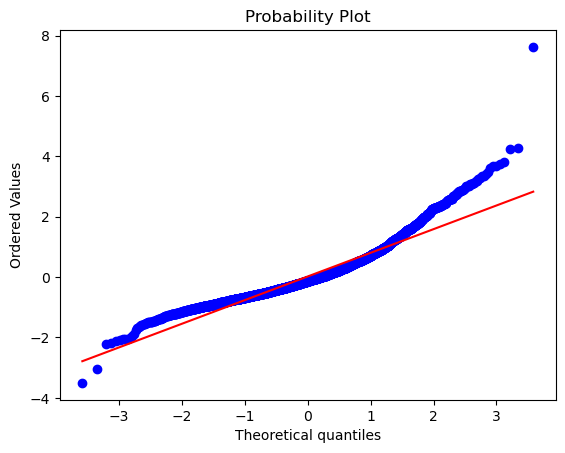

In [113]:
# Histogram of Residuals

# Compute residuals
preds = lr.predict(X_test)
residuals = y_test - preds  # (Actual - Predictions)
sns.histplot(residual,kde=True,color='green')
plt.xlabel('residuals ')
plt.ylabel('frequency')
plt.title('histogram of residuals')
plt.show()

# q-q plot
import scipy.stats as stats
stats.probplot(residuals,dist='norm',plot=plt)
plt.show()

In [ ]:


############################################## Save the model (pickle) ################################
import pickle
path=open('linear_regression_california.pkl','wb')
pickle.dump(lr,path)

# (above code will be give with 0kb so use below , always use with)
with open('linear_regression_california1.pkl','wb') as file:
    pickle.dump(lr,file)
    
############################################ Load the model(pickle) ########################################
path=open('linear_regression_california.pkl','rb')
loaded_model=pickle.load(path)
loaded_model

############################################ save the model (joblib)################################################
import joblib

# joblib.dump(<model_name>,<location+name+extension>)
joblib.dump(lr,'linear_regression_california.joblib')

########################################### load the model (joblib) ################################################
saved_model=joblib.load('linear_regression_california.joblib')
saved_model